## Import the file uploaded in the DBFS

In [0]:
%fs cp dbfs:/FileStore/TrendsMarket/US_Accidents_March23_sampled_500k.zip file:/databricks/driver/US_Accidents.zip

res0: Boolean = true

In [0]:
!ls -l

total 54772
-rw-r--r-- 1 root root 54752696 Dec  5 20:10 US_Accidents.zip
drwxr-xr-x 2 root root     4096 Dec  5 07:09 azure
drwxr-xr-x 2 root root     4096 Dec  5 07:09 conf
drwxr-xr-x 3 root root     4096 Dec  5 20:09 eventlogs
-r-xr-xr-x 1 root root     2755 Dec  5 07:09 hadoop_accessed_config.lst
drwxr-xr-x 2 root root     4096 Dec  5 20:09 logs
-r-xr-xr-x 1 root root  1306936 Dec  5 07:09 preload_class.lst


In [0]:
!unzip US_Accidents.zip 

Archive:  US_Accidents.zip
  inflating: US_Accidents_March23_sampled_500k.csv  


## Create a dataframe by using pyspark

In [0]:
us_acc = spark.read.csv("file:/databricks/driver/US_Accidents_March23_sampled_500k.csv", inferSchema=True, header=True).cache()

In [0]:
us_acc.write.parquet('file:/databricks/driver/US Accident Sample/')

In [0]:
# dbutils.fs.rm('file:/databricks/driver/Trends Market Parquet/', recurse=True)

In [0]:
!ls  -l

total 247360
drwxr-xr-x 2 root root      4096 Dec  5 20:12 'US Accident Sample'
-rw-r--r-- 1 root root  54752696 Dec  5 20:10  US_Accidents.zip
-rw-r--r-- 1 root root 197199338 Nov 16 03:20  US_Accidents_March23_sampled_500k.csv
drwxr-xr-x 2 root root      4096 Dec  5 07:09  azure
drwxr-xr-x 2 root root      4096 Dec  5 07:09  conf
drwxr-xr-x 3 root root      4096 Dec  5 20:09  eventlogs
-r-xr-xr-x 1 root root      2755 Dec  5 07:09  hadoop_accessed_config.lst
drwxr-xr-x 2 root root      4096 Dec  5 20:11  logs
drwxr-xr-x 5 root root      4096 Dec  5 20:11  metastore_db
-r-xr-xr-x 1 root root   1306936 Dec  5 07:09  preload_class.lst


In [0]:
us_acc = spark.read.parquet("file:/databricks/driver/US Accident Sample/").cache()

In [0]:
us_acc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: timestamp (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- V

In [0]:
us_acc.limit(10).display()

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
A-6932963,Source1,2,2020-11-07T22:01:59.000+0000,2020-11-07T23:58:58.000+0000,26.390415,-80.099676,26.374375,-80.116476,1.52,Incident on I-95 SB near EXIT 45 Left shoulder closed.,I-95 S,Boca Raton,Palm Beach,FL,33431,US,US/Eastern,KBCT,2020-11-07T21:22:00.000+0000,79.0,79.0,84.0,29.88,8.0,E,25.0,0.0,Cloudy / Windy,false,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Night,Night
A-6115247,Source1,2,2021-08-31T16:00:02.000+0000,2021-08-31T16:33:20.000+0000,28.339375,-81.410286,28.337149,-81.40383299999998,0.421,Slow traffic from N Bermuda Ave/N John Young Pkwy (W Osceola Pkwy) to US-441/N Orange Blossom Trl (W Osceola Pkwy) due to accident.,W Osceola Pkwy,Kissimmee,Osceola,FL,34741-7586,US,US/Eastern,KISM,2021-08-31T15:56:00.000+0000,95.0,95.0,47.0,29.8,10.0,WNW,10.0,0.0,Fair,false,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day
A-4043983,Source1,2,2022-03-05T13:18:30.000+0000,2022-03-05T15:21:00.000+0000,34.152413,-118.095331,34.120859,-117.879937,12.51,Slow traffic on I-210 E - Foothill Fwy E from Sierra Madre Blvd/Altadena Dr (I-210) to Grand Ave (I-210) due to accident.,Foothill Fwy E,Pasadena,Los Angeles,CA,91107,US,US/Pacific,KMWS,null,null,null,null,null,null,null,null,null,null,false,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day
A-1415732,Source2,2,2020-08-07T19:36:52.000+0000,2020-08-07T20:22:39.000+0000,36.139839,-86.78759000000002,null,null,0.0,Accident on 12th Ave at Horton Ave.,Horton Ave,Nashville,Davidson,TN,37212-3032,US,US/Central,KBNA,2020-08-07T19:53:00.000+0000,81.0,81.0,56.0,29.46,10.0,N,7.0,0.0,Fair,false,false,false,false,false,false,false,false,false,false,false,true,false,Day,Day,Day,Day
A-5499272,Source1,2,2021-12-02T17:56:49.000+0000,2021-12-02T19:59:19.000+0000,32.908407000000004,-96.838198,32.909453000000006,-96.834749,0.213,Stationary traffic from Cedarbrush Dr to Crestline Ave due to accident.,Midway Rd,Dallas,Dallas,TX,75229,US,US/Central,KDAL,2021-12-02T17:53:00.000+0000,72.0,72.0,59.0,29.52,10.0,SSE,7.0,0.0,Mostly Cloudy,false,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Day,Day
A-829501,Source2,2,2021-11-08T06:55:59.000+0000,2021-11-08T07:40:18.000+0000,33.881962,-117.880585,null,null,0.0,#1 lane blocked and HOV lane blocked due to accident on CA-57 Southbound after Exit 8 Yorba Linda Blvd. SigAlert issued.,CA-57 S,Fullerton,Orange,CA,92831,US,US/Pacific,KFUL,2021-11-08T06:53:00.000+0000,58.0,58.0,78.0,29.93,7.0,ENE,3.0,0.0,Cloudy,false,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day
A-3008800,Source2,3,2018-02-13T08:07:14.000+0000,2018-02-13T08:36:41.000+0000,34.227894,-83.862282,null,null,0.0,Right lane blocked due to accident on I-985 Southbound at Exits 16 17 GA-53 Mundy Mill Rd.,GA-365 S,Gainesville,Hall,GA,30504,US,US/Eastern,KGVL,2018-02-13T07:53:00.000+0000,42.1,34.5,82.0,30.6,10.0,ENE,15.0,null,Overcast,false,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day
A-6623837,Source1,2,2020-12-30T20:31:00.000+0000,2020-12-30T22:16:23.000+0000,36.739364,-80.769349,36.677404,-80.711739,5.34,Incident on I-77 SB near MM 12 Expect delays.,I-77 S,Hillsville,Carroll,VA,24343,US,US/Eastern,KHLX,2020-12-30T20:35:00.000+0000,42.0,38.0,96.0,27.32,7.0,S,6.0,0.0,Cloudy,false,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Night,Night
A-2

In [0]:
us_acc.count()

Out[10]: 500000

## Select columns that is going to be used in the prediction model

In [0]:
## weather condition has too many categories, Turning_Loop all False!!
us_acc_train = us_acc['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

In [0]:
us_acc_train.limit(10).display()

Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,1.52,79.0,79.0,84.0,29.88,8.0,25.0,0.0,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Night,Night
2,0.421,95.0,95.0,47.0,29.8,10.0,10.0,0.0,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day
2,12.51,null,null,null,null,null,null,null,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day
2,0.0,81.0,81.0,56.0,29.46,10.0,7.0,0.0,false,false,false,false,false,false,false,false,false,false,false,true,Day,Day,Day,Day
2,0.213,72.0,72.0,59.0,29.52,10.0,7.0,0.0,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Day,Day
2,0.0,58.0,58.0,78.0,29.93,7.0,3.0,0.0,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day
3,0.0,42.1,34.5,82.0,30.6,10.0,15.0,null,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day
2,5.34,42.0,38.0,96.0,27.32,7.0,6.0,0.0,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Night,Night
2,0.0,19.0,12.3,81.0,30.19,10.0,4.6,null,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day
2,0.0,63.0,63.0,42.0,28.91,7.0,0.0,0.0,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Day,Day


## Change column type from integer to double, and boolean to string(later we will apply StringIndexer)

In [0]:
from pyspark.sql.functions import col
double_columns = ['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
for column in double_columns:
    us_acc_train = us_acc_train.withColumn(column, col(column).cast("double"))

In [0]:
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
for column in boolean_columns:
    us_acc_train = us_acc_train.withColumn(column, col(column).cast("string"))

In [0]:
us_acc_train.printSchema()

root
 |-- Severity: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Precipitation(in): double (nullable = true)
 |-- Amenity: string (nullable = true)
 |-- Bump: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Give_Way: string (nullable = true)
 |-- Junction: string (nullable = true)
 |-- No_Exit: string (nullable = true)
 |-- Railway: string (nullable = true)
 |-- Roundabout: string (nullable = true)
 |-- Station: string (nullable = true)
 |-- Stop: string (nullable = true)
 |-- Traffic_Calming: string (nullable = true)
 |-- Traffic_Signal: string (nullable = true)
 |-- Sunrise_Sunset: string (nullable = true)
 |-- Civil_Twilight: string (nullable = true)
 |-- Nautical_Tw

## Drop null values in categorical data and numerical data

In [0]:
for column in us_acc_train.columns:
    null_count = us_acc_train.filter(col(column).isNull()).count()
    print(f"Null count for column '{column}': {null_count}")

Null count for column 'Severity': 0
Null count for column 'Distance(mi)': 0
Null count for column 'Temperature(F)': 10466
Null count for column 'Wind_Chill(F)': 129017
Null count for column 'Humidity(%)': 11130
Null count for column 'Pressure(in)': 8928
Null count for column 'Visibility(mi)': 11291
Null count for column 'Wind_Speed(mph)': 36987
Null count for column 'Precipitation(in)': 142616
Null count for column 'Amenity': 0
Null count for column 'Bump': 0
Null count for column 'Crossing': 0
Null count for column 'Give_Way': 0
Null count for column 'Junction': 0
Null count for column 'No_Exit': 0
Null count for column 'Railway': 0
Null count for column 'Roundabout': 0
Null count for column 'Station': 0
Null count for column 'Stop': 0
Null count for column 'Traffic_Calming': 0
Null count for column 'Traffic_Signal': 0
Null count for column 'Sunrise_Sunset': 1483
Null count for column 'Civil_Twilight': 1483
Null count for column 'Nautical_Twilight': 1483
Null count for column 'Astrono

In [0]:
numerical_cols = ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
us_acc_train = us_acc_train.dropna(subset=numerical_cols)

In [0]:
categorical_col = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
us_acc_train = us_acc_train.dropna(subset=categorical_col)

In [0]:
for column in us_acc_train.columns:
    null_count = us_acc_train.filter(col(column).isNull()).count()
    print(f"Null count for column '{column}': {null_count}")

Null count for column 'Severity': 0
Null count for column 'Distance(mi)': 0
Null count for column 'Temperature(F)': 0
Null count for column 'Wind_Chill(F)': 0
Null count for column 'Humidity(%)': 0
Null count for column 'Pressure(in)': 0
Null count for column 'Visibility(mi)': 0
Null count for column 'Wind_Speed(mph)': 0
Null count for column 'Precipitation(in)': 0
Null count for column 'Amenity': 0
Null count for column 'Bump': 0
Null count for column 'Crossing': 0
Null count for column 'Give_Way': 0
Null count for column 'Junction': 0
Null count for column 'No_Exit': 0
Null count for column 'Railway': 0
Null count for column 'Roundabout': 0
Null count for column 'Station': 0
Null count for column 'Stop': 0
Null count for column 'Traffic_Calming': 0
Null count for column 'Traffic_Signal': 0
Null count for column 'Sunrise_Sunset': 0
Null count for column 'Civil_Twilight': 0
Null count for column 'Nautical_Twilight': 0
Null count for column 'Astronomical_Twilight': 0


## Filter out the extreme value( like Temperature is 207F...)

In [0]:
from pyspark.sql import functions as F
## outlier detection
## I don't include precipitation becuase i think precipitation might be extreme when there is really flooding happening
numerical_columns = ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
for column in numerical_columns:
    print(column)
    quantiles = us_acc_train.approxQuantile(column, [0.25, 0.75], 0.05)
    q1 = quantiles[0]
    q3 = quantiles[1]
    epsilon = 1e-4
    iqr = max(q3 - q1, epsilon)
    # Define a multiplier for identifying potential outliers (adjust as needed)
    outlier_multiplier = 3

    # Define lower and upper bounds for potential outliers
    lower_bound = q1 - outlier_multiplier * iqr
    upper_bound = q3 + outlier_multiplier * iqr
    min_max_values = us_acc_train.agg(F.min(column).alias('min_value'), F.max(column).alias('max_value')).collect()[0]
    print('Original Max Value: ', min_max_values['max_value'])

    us_acc_train = us_acc_train.filter(F.col(column) < upper_bound)
    min_max_values = us_acc_train.agg(F.min(column).alias('min_value'), F.max(column).alias('max_value')).collect()[0]
    print('New Max Value: ', min_max_values['max_value'])


Distance(mi)
Original Max Value:  149.69
New Max Value:  1.979
Temperature(F)
Original Max Value:  196.0
New Max Value:  140.0
Wind_Chill(F)
Original Max Value:  140.0
New Max Value:  140.0
Humidity(%)
Original Max Value:  100.0
New Max Value:  100.0
Pressure(in)
Original Max Value:  31.08
New Max Value:  31.08
Visibility(mi)
Original Max Value:  100.0
New Max Value:  10.0
Wind_Speed(mph)
Original Max Value:  243.0
New Max Value:  30.0


In [0]:
us_acc_train.count()

Out[21]: 306849

## Fill the 0 value with its own second minimal value in some columns which having 0 value does not make sense 

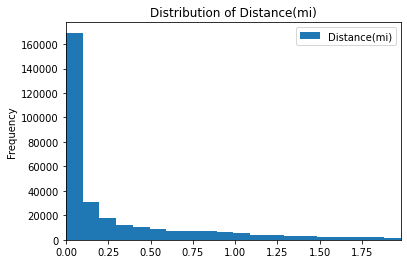

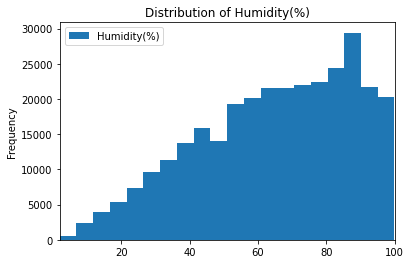

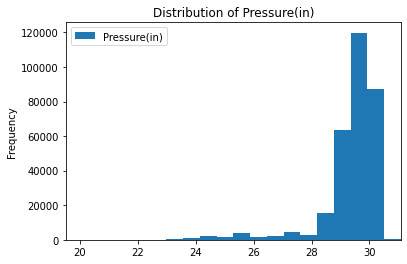

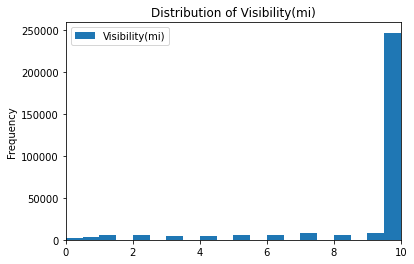

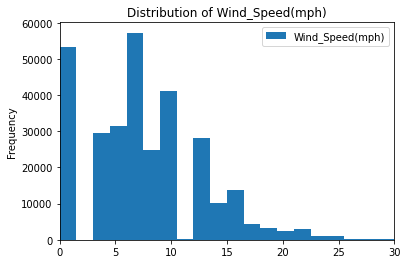

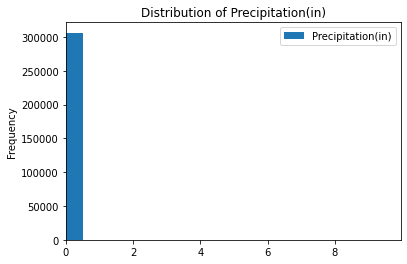

In [0]:
## observe the distribution before filling
import matplotlib.pyplot as plt
zero_cols = ['Distance(mi)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
for column in zero_cols:
    histogram = us_acc_train.select(column).toPandas().plot(kind='hist', title=f'Distribution of {column}', bins=20)
    min_max_values = us_acc_train.agg(F.min(column).alias('min_value'), F.max(column).alias('max_value')).collect()[0]
    min_value = min_max_values['min_value']
    max_value = min_max_values['max_value']
    min_value = min_value  # Replace with your desired minimum value
    max_value = max_value  # Replace with your desired maximum value
    histogram.set_xlim(min_value, max_value)
    plt.show()

In [0]:
for column in zero_cols:
    null_count = us_acc_train.filter(col(column)==0).count()
    print(f"0 value count for column '{column}': {null_count}")

0 value count for column 'Distance(mi)': 117767
0 value count for column 'Humidity(%)': 0
0 value count for column 'Pressure(in)': 0
0 value count for column 'Visibility(mi)': 398
0 value count for column 'Wind_Speed(mph)': 53417
0 value count for column 'Precipitation(in)': 282929


In [0]:
from pyspark.sql.window import Window
for column in zero_cols:
    window_spec = Window.orderBy(F.col(column))
    df_ranked = us_acc_train.withColumn('rank', F.dense_rank().over(window_spec))
    # Find the second minimum value (excluding zeros)
    second_min = df_ranked.filter(F.col('rank') == 2).select(column).collect()[0][0]
    # Replace zero values with the second minimum value in the column
    us_acc_train = us_acc_train.withColumn(column, F.when(us_acc_train[column] == 0, second_min).otherwise(us_acc_train[column]))

In [0]:
for column in zero_cols:
    null_count = us_acc_train.filter(col(column)==0).count()
    print(f"0 value count for column '{column}': {null_count}")

0 value count for column 'Distance(mi)': 0
0 value count for column 'Humidity(%)': 0
0 value count for column 'Pressure(in)': 0
0 value count for column 'Visibility(mi)': 0
0 value count for column 'Wind_Speed(mph)': 0
0 value count for column 'Precipitation(in)': 0


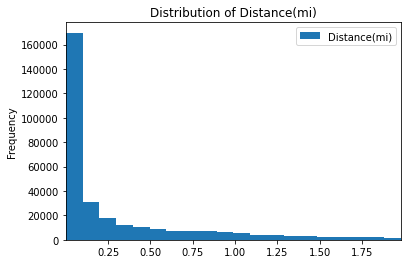

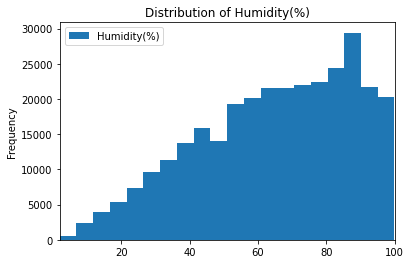

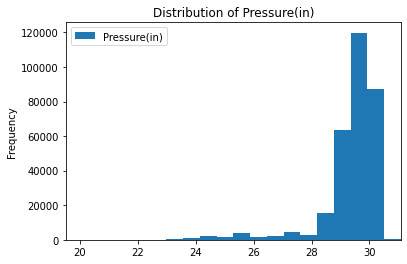

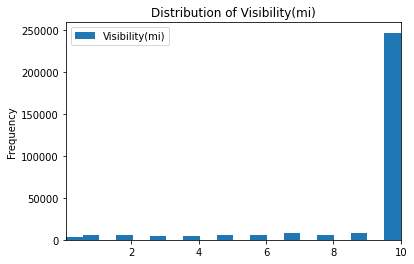

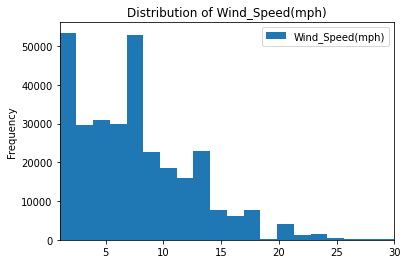

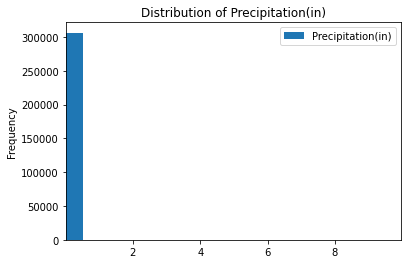

In [0]:
## observe the distribution before filling
zero_cols = ['Distance(mi)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
for column in zero_cols:
    histogram = us_acc_train.select(column).toPandas().plot(kind='hist', title=f'Distribution of {column}', bins=20)
    min_max_values = us_acc_train.agg(F.min(column).alias('min_value'), F.max(column).alias('max_value')).collect()[0]
    min_value = min_max_values['min_value']
    max_value = min_max_values['max_value']
    min_value = min_value  # Replace with your desired minimum value
    max_value = max_value  # Replace with your desired maximum value
    histogram.set_xlim(min_value, max_value)
    plt.show()

## Convert Target Variable to Binary

In [0]:
us_acc_train.select('Severity').distinct().collect()

Out[27]: [Row(Severity=1.0), Row(Severity=4.0), Row(Severity=3.0), Row(Severity=2.0)]

In [0]:
from pyspark.sql.functions import when
condition_set1 = (col("Severity") == 1) | (col("Severity") == 2)
condition_set2 = (col("Severity") == 3) | (col("Severity") == 4)

us_acc_train = us_acc_train.withColumn(
    "Severity",
    when(condition_set1, 0)
    .when(condition_set2, 1)
)

In [0]:
us_acc_train.select('Severity').distinct().collect()

Out[29]: [Row(Severity=1), Row(Severity=0)]

## Make Target Variable balanced

In [0]:
severity_counts = us_acc_train.groupBy("Severity").count()
severity_counts.show()

+--------+------+
|Severity| count|
+--------+------+
|       1| 42143|
|       0|264706|
+--------+------+



In [0]:
from pyspark.sql.functions import col

# Assuming 'train_data' is your training DataFrame
majority_class = us_acc_train.filter(col("Severity") == 0)
minority_class = us_acc_train.filter(col("Severity") == 1)

oversampled_minority = minority_class.sample(True, 6.0, seed=42)  # Adjust fraction as needed
us_acc_train = majority_class.union(oversampled_minority)

In [0]:
severity_counts = us_acc_train.groupBy("Severity").count()
severity_counts.show()

+--------+------+
|Severity| count|
+--------+------+
|       0|264706|
|       1|252071|
+--------+------+



## Construct a pipeline

#### Apply StringIndexer

In [0]:
from pyspark.ml.feature import StringIndexer
categorical_col = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
si = StringIndexer(inputCols = categorical_col, outputCols = [c + "_idx" for c in categorical_col])
us_acc_train_si = si.fit(us_acc_train).transform(us_acc_train)

In [0]:
us_acc_train_si.limit(10).display()

Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Amenity_idx,Bump_idx,Crossing_idx,Give_Way_idx,Junction_idx,No_Exit_idx,Railway_idx,Roundabout_idx,Station_idx,Stop_idx,Traffic_Calming_idx,Traffic_Signal_idx,Sunrise_Sunset_idx,Civil_Twilight_idx,Nautical_Twilight_idx,Astronomical_Twilight_idx
0,1.52,79.0,79.0,84.0,29.88,8.0,25.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Night,Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
0,0.421,95.0,95.0,47.0,29.8,10.0,10.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.001,81.0,81.0,56.0,29.46,10.0,7.0,0.01,false,false,false,false,false,false,false,false,false,false,false,true,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,0.213,72.0,72.0,59.0,29.52,10.0,7.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
0,0.001,58.0,58.0,78.0,29.93,7.0,3.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.001,63.0,63.0,42.0,28.91,7.0,1.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
0,1.521,70.0,70.0,47.0,30.11,10.0,13.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.214,74.0,74.0,55.0,30.05,10.0,15.0,0.01,false,false,true,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.001,72.0,72.0,88.0,30.02,10.0,3.0,0.01,false,false,false,false,false,false,false,false,false,false,false,true,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,1.557,88.0,88.0,55.0,29.99,10.0,10.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Apply One Hot Encoder

In [0]:
from pyspark.ml.feature import OneHotEncoder
ohe = OneHotEncoder(inputCols = [c + "_idx" for c in categorical_col], outputCols = [c + "_ohe" for c in categorical_col])
us_acc_train_ohe = ohe.fit(us_acc_train_si).transform(us_acc_train_si)

In [0]:
us_acc_train_ohe.limit(5).display()

Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Amenity_idx,Bump_idx,Crossing_idx,Give_Way_idx,Junction_idx,No_Exit_idx,Railway_idx,Roundabout_idx,Station_idx,Stop_idx,Traffic_Calming_idx,Traffic_Signal_idx,Sunrise_Sunset_idx,Civil_Twilight_idx,Nautical_Twilight_idx,Astronomical_Twilight_idx,Amenity_ohe,Bump_ohe,Crossing_ohe,Give_Way_ohe,Junction_ohe,No_Exit_ohe,Railway_ohe,Roundabout_ohe,Station_ohe,Stop_ohe,Traffic_Calming_ohe,Traffic_Signal_ohe,Sunrise_Sunset_ohe,Civil_Twilight_ohe,Nautical_Twilight_ohe,Astronomical_Twilight_ohe
0,1.52,79.0,79.0,84.0,29.88,8.0,25.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Night,Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())"
0,0.421,95.0,95.0,47.0,29.8,10.0,10.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))"
0,0.001,81.0,81.0,56.0,29.46,10.0,7.0,0.01,false,false,false,false,false,false,false,false,false,false,false,true,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"Map(

#### Apply Normalizer

In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
nva = VectorAssembler(inputCols=numerical_cols, outputCol="numerical_features")
us_acc_train_nva = nva.transform(us_acc_train_ohe)

scaler = StandardScaler(inputCol = "numerical_features", outputCol = "scaled_features")
us_acc_train_scaled = scaler.fit(us_acc_train_nva).transform(us_acc_train_nva)


In [0]:
us_acc_train_scaled.limit(10).display()

Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Amenity_idx,Bump_idx,Crossing_idx,Give_Way_idx,Junction_idx,No_Exit_idx,Railway_idx,Roundabout_idx,Station_idx,Stop_idx,Traffic_Calming_idx,Traffic_Signal_idx,Sunrise_Sunset_idx,Civil_Twilight_idx,Nautical_Twilight_idx,Astronomical_Twilight_idx,Amenity_ohe,Bump_ohe,Crossing_ohe,Give_Way_ohe,Junction_ohe,No_Exit_ohe,Railway_ohe,Roundabout_ohe,Station_ohe,Stop_ohe,Traffic_Calming_ohe,Traffic_Signal_ohe,Sunrise_Sunset_ohe,Civil_Twilight_ohe,Nautical_Twilight_ohe,Astronomical_Twilight_ohe,numerical_features,scaled_features
0,1.52,79.0,79.0,84.0,29.88,8.0,25.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Night,Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> dense, length -> 8, values -> List(1.52, 79.0, 79.0, 84.0, 29.88, 8.0, 25.0, 0.01))","Map(vectorType -> dense, length -> 8, values -> List(3.601591167282833, 4.148296255774492, 3.705873133716913, 3.72072065684743, 26.85269760650326, 3.2925392690280164, 4.895616396653085, 0.21781494942566842))"
0,0.421,95.0,95.0,47.0,29.8,10.0,10.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorTyp

#### Apply Vector Assembler

In [0]:
va = VectorAssembler(inputCols=["scaled_features"] + [c + "_ohe" for c in categorical_col], outputCol="features")
us_acc_train_va = va.transform(us_acc_train_scaled)


In [0]:
us_acc_train_va.limit(20).display()

Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Amenity_idx,Bump_idx,Crossing_idx,Give_Way_idx,Junction_idx,No_Exit_idx,Railway_idx,Roundabout_idx,Station_idx,Stop_idx,Traffic_Calming_idx,Traffic_Signal_idx,Sunrise_Sunset_idx,Civil_Twilight_idx,Nautical_Twilight_idx,Astronomical_Twilight_idx,Amenity_ohe,Bump_ohe,Crossing_ohe,Give_Way_ohe,Junction_ohe,No_Exit_ohe,Railway_ohe,Roundabout_ohe,Station_ohe,Stop_ohe,Traffic_Calming_ohe,Traffic_Signal_ohe,Sunrise_Sunset_ohe,Civil_Twilight_ohe,Nautical_Twilight_ohe,Astronomical_Twilight_ohe,numerical_features,scaled_features,features
0,1.52,79.0,79.0,84.0,29.88,8.0,25.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Night,Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> dense, length -> 8, values -> List(1.52, 79.0, 79.0, 84.0, 29.88, 8.0, 25.0, 0.01))","Map(vectorType -> dense, length -> 8, values -> List(3.601591167282833, 4.148296255774492, 3.705873133716913, 3.72072065684743, 26.85269760650326, 3.2925392690280164, 4.895616396653085, 0.21781494942566842))","Map(vectorType -> dense, length -> 24, values -> List(3.601591167282833, 4.148296255774492, 3.705873133716913, 3.72072065684743, 26.85269760650326, 3.2925392690280164, 4.895616396653085, 0.21781494942566842, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0))"
0,0.421,95.0,95.0,47.0,29.8,10.0,10.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, in

## Build the model
- 1. Create the LogisticRegression model (for use with the pipeline)
- 2. Create the RandomForest model (for use with the pipeline)
- 3. Create the SVM model (for use with the pipeline)

## Logistc Regression

In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol = 'Severity', featuresCol =  'features', family='binomial')

In [0]:
train, test = us_acc_train.randomSplit([0.7, 0.3], seed=0)
print("train {} test {}".format(train.count(), test.count()))

train 361911 test 154866


In [0]:
from pyspark.ml import Pipeline
pl = Pipeline(stages = [si, ohe, nva, scaler, va, lr])
pl_model = pl.fit(train)
results = pl_model.transform(test)

In [0]:
# Confusion Matrix
confusion_matrix = results.groupBy("Severity", "prediction").count()
confusion_matrix.show()

+--------+----------+-----+
|Severity|prediction|count|
+--------+----------+-----+
|       0|       0.0|43469|
|       0|       1.0|35696|
|       1|       0.0|19319|
|       1|       1.0|56382|
+--------+----------+-----+



In [0]:
FP_rate = round((35696 / (43469 + 35696 + 19319 + 56382))*100,2)
FP_rate

Out[45]: 23.05

In [0]:
## Accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
e_acc = MulticlassClassificationEvaluator(labelCol='Severity', predictionCol='prediction', metricName='accuracy')
acc = e_acc.evaluate(results)
print("Accuracy: {}".format(acc))

Accuracy: 0.6447574031743571


In [0]:
## ROC Curve and AUC 
from pyspark.mllib.evaluation import BinaryClassificationMetrics
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        for row in rdd.collect():
            points += [(float(row._1()), float(row._2()))]
        return points
    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


AUC: 0.6923292737753876


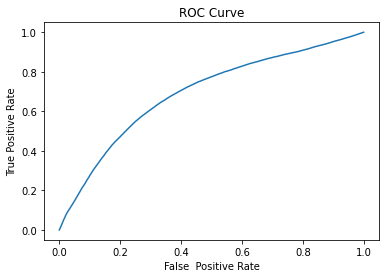

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt

evaluator = BinaryClassificationEvaluator(labelCol="Severity", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc_value = evaluator.evaluate(results)

import matplotlib.pyplot as plt
# Returns as a list (false positive rate, true positive rate)
preds = results.select('Severity','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['Severity'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title('ROC Curve')
plt.xlabel('False  Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(x_val, y_val)
print(f"AUC: {auc_value}")

## Random Forest

In [0]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol = 'Severity', featuresCol =  'features')

In [0]:
from pyspark.ml import Pipeline
pl = Pipeline(stages = [si, ohe, nva, scaler, va, rf])
pl_model = pl.fit(train)
results = pl_model.transform(test)

In [0]:
pl_model.write().overwrite().save("file:///C:/Users/nba35/Desktop/UMN/Big Data Analytics/Trends Market/rf_pipeline")


In [0]:
# Confusion Matrix
confusion_matrix = results.groupBy("Severity", "prediction").count()
confusion_matrix.show()

+--------+----------+-----+
|Severity|prediction|count|
+--------+----------+-----+
|       0|       0.0|62107|
|       0|       1.0|17058|
|       1|       0.0|24200|
|       1|       1.0|51501|
+--------+----------+-----+



In [0]:
FP_rate = round((17058 / (62107 + 17058 + 24200 + 51501))*100,2)
FP_rate

Out[53]: 11.01

In [0]:
## Accuracy
e_acc = MulticlassClassificationEvaluator(labelCol='Severity', predictionCol='prediction', metricName='accuracy')
acc = e_acc.evaluate(results)
print("Accuracy: {}".format(acc))

Accuracy: 0.733589038265339


AUC: 0.7648138922941184


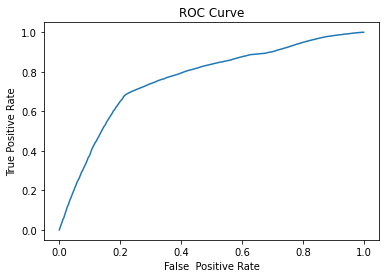

In [0]:
## ROC Curve and AUC
evaluator = BinaryClassificationEvaluator(labelCol="Severity", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc_value = evaluator.evaluate(results)

import matplotlib.pyplot as plt
# Returns as a list (false positive rate, true positive rate)
preds = results.select('Severity','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['Severity'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title('ROC Curve')
plt.xlabel('False  Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(x_val, y_val)
print(f"AUC: {auc_value}")

## SVM Model

In [0]:
from pyspark.ml.classification import LinearSVC
svm = LinearSVC(maxIter=10, regParam=0.1, labelCol = 'Severity', featuresCol =  'features')

In [0]:
from pyspark.ml import Pipeline
pl = Pipeline(stages = [si, ohe, nva, scaler, va, svm])
pl_model = pl.fit(train)
results = pl_model.transform(test)

In [0]:
results.limit(10).display()

Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Amenity_idx,Bump_idx,Crossing_idx,Give_Way_idx,Junction_idx,No_Exit_idx,Railway_idx,Roundabout_idx,Station_idx,Stop_idx,Traffic_Calming_idx,Traffic_Signal_idx,Sunrise_Sunset_idx,Civil_Twilight_idx,Nautical_Twilight_idx,Astronomical_Twilight_idx,Amenity_ohe,Bump_ohe,Crossing_ohe,Give_Way_ohe,Junction_ohe,No_Exit_ohe,Railway_ohe,Roundabout_ohe,Station_ohe,Stop_ohe,Traffic_Calming_ohe,Traffic_Signal_ohe,Sunrise_Sunset_ohe,Civil_Twilight_ohe,Nautical_Twilight_ohe,Astronomical_Twilight_ohe,numerical_features,scaled_features,features,rawPrediction,prediction
0,0.001,-11.0,-25.0,75.0,29.38,10.0,6.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Night,Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> dense, length -> 8, values -> List(0.001, -11.0, -25.0, 75.0, 29.38, 10.0, 6.0, 0.01))","Map(vectorType -> dense, length -> 8, values -> List(0.002367769961056211, -0.5775846756359538, -1.1727324261151755, 3.3220622479704716, 26.424530085710124, 4.109737930975815, 1.1750297503780511, 0.21567421742519222))","Map(vectorType -> dense, length -> 24, values -> List(0.002367769961056211, -0.5775846756359538, -1.1727324261151755, 3.3220622479704716, 26.424530085710124, 4.109737930975815, 1.1750297503780511, 0.21567421742519222, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0))","Map(vectorType -> dense, length -> 2, values -> List(-0.4306171118730928, 0.4306171118730928))",1.0
0,0.001,-7.0,-18.0,79.0,29.42,10.0,5.0,0.01,false,false,false,false,false,false,false,false,false,false,false,false,Night,Night,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 1, indices -

In [0]:
# Confusion Matrix
confusion_matrix = results.groupBy("Severity", "prediction").count()
confusion_matrix.show()

+--------+----------+-----+
|Severity|prediction|count|
+--------+----------+-----+
|       0|       0.0|33523|
|       0|       1.0|45642|
|       1|       0.0|14446|
|       1|       1.0|61255|
+--------+----------+-----+



In [0]:
FP_rate = round((35523 / (33523 + 45642 + 14446 + 61255))*100,2)
FP_rate

Out[60]: 22.94

In [0]:
## Accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
e_acc = MulticlassClassificationEvaluator(labelCol='Severity', predictionCol='prediction', metricName='accuracy')
acc = e_acc.evaluate(results)
print("Accuracy: {}".format(acc))

Accuracy: 0.612000051657562


AUC: 0.6994655693050185


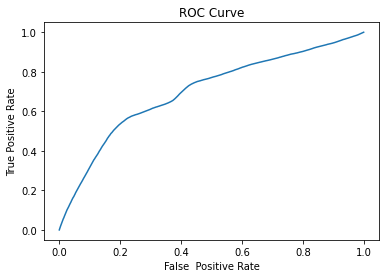

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt

evaluator = BinaryClassificationEvaluator(labelCol="Severity", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc_value = evaluator.evaluate(results)

import matplotlib.pyplot as plt
# Returns as a list (false positive rate, true positive rate)
preds = results.select('Severity','rawPrediction').rdd.map(lambda row: (float(row['rawPrediction'][1]), float(row['Severity'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title('ROC Curve')
plt.xlabel('False  Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(x_val, y_val)
print(f"AUC: {auc_value}")